# 로컬 레벨 모형

로컬 레벨 모형(local level model)은 랜덤 워크 모형에 관측 잡음이 추가된 것이다. 다음과 같이 랜덤 워크 과정 모형을 따르는 단변수 상태 변수 $\mu_t$를 가진다.

$$
\begin{eqnarray}
\mu_t &=& \mu_{t-1} + w_t &,\;\;\; & w_t \sim N(0, \sigma_w^2) \\
Y_{t} &=& \mu_{t} + v_t &,\;\;\; & v_t \sim {N}(0, \sigma_v^2) \\
\end{eqnarray}
$$

## ARIMA 모형과의 관계

로컬 레벨 모형은 다음과 같이 ARIMA 모형 형태로 변환할 수 있다.

$$ \mu_t = Y_t - v_t $$

$$ Y_t - v_t = Y_{t-1} - v_{t-1} + w_t $$

$$ \Delta Y_t = Y_t - Y_{t-1} = w_t + v_t - v_{t-1} $$

이 식에서 $\Delta Y_t$의 기댓값과 자기상관관계를 구하면 다음과 같다.

$$ \text{E} \left[ \Delta Y_t \right] = \text{E} \left[ w_t + v_t - v_{t-1} \right] =0 $$

$$
\begin{eqnarray}
\text{E} [ \Delta Y_t^2 ] 
&=& \text{E} \left[ (w_t + v_t - v_{t-1})(w_{t} + v_{t} - v_{t-1}) \right] \\
&=& \text{E} \left[ w_t^2 + v_t^2 + v_{t-1}^2 \right] \\
&=& \sigma_w^2 + 2\sigma_v^2 \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{E} [ \Delta Y_t \Delta Y_{t-1} ] 
&=& \text{E} \left[ (w_t + v_t - v_{t-1})(w_{t-1} + v_{t-1} - v_{t-2}) \right] \\
&=& - \text{E} \left[ v_{t-1}^2 \right] \\
&=& -\sigma_v^2 \\
\end{eqnarray}
$$

$$
\text{E} [ \Delta Y_t \Delta Y_{t-l} ] = 0, \;\;\; \text{for } l > 1
$$

이 값에서 $\Delta Y_t$는 MA(1) 모형을 따르고 $Y_t$는 ARIMA(0,1,1) 모형을 따르는 것을 알 수 있다. 즉 로컬 레벨 모형은 ARIMA(0,1,1)의 또 다른 표현(representation)이라고 볼 수 있다.

## ARIMA 모형과의 차이점

ARIMA(0,1,1)이 아닌 로컬 레벨 모형을 사용하는 이유는 다음과 같이 이유와 가정 때문이다.

* 우리가 관심을 가지는 값은 어떤 이유에 의해 _**반드시**_ 랜덤 워크 모형을 따라야 한다.
* 그런데 시계열 자료 $Y_t$는 랜덤 워크 모형을 따르지 않는다. (ARIMA(0,1,1) 모형을 따름)
* 그러므로 시계열 자료 $Y_t$는 우리가 원하는 랜덤 워크 $\mu_t$에 관측 잡음이 더해진 걸로 _**가정**_하자.
* 이제 풀어야 하는 문제는 시계열 자료 $Y_t$를 사용하여 랜덤 워크 모형을 따르는, 잡음을 제거한 원래의 값 $mu_t$이다.

## 로컬 레벨 모형의 예 1

예를 들어 어떤 섬 근처에서 배가 엔진을 끄고 정지해 있다. 물리학적인 지식과 가정에 따라 이 배는 파도에 의한 브라운 운동(Brown montion)을 하게 된다. 즉, 파도의 랜덤한 힘에 밀려 배의 위치 $\mu_t$가 차츰 변하며 그 변화는 다음과 같은 수식을 따른다고 _**가정한다.**_

$$ \mu_t = \mu_{t-1} + w_t $$ 

이 식에서 $w_t$는 시간 $t$에서 파도의 영향에 의한 움직임이며 가우시안 정규 분포를 따른다고 가정한다.

매 시간마다 배의 선원은 섬으로부터의 거리 $Y_t$를 배에 있는 초음파 거리계(ultrasonic range finder)로 측정한다. 초음파 거리계로 잰 값 $Y_t$는 가우시안 정규 분포에 따르는 오차를 가지고 있다는 것을 제조사 정보로부터 알고 있다.

이러한 경우에 정확한 거리 $\mu_t$를 알고자 하는 것이 바로 로컬 레벨 모형의 필터링(filtering) 문제가 된다. 

## 로컬 레벨 모형의 예 2

효율적인 시장에서 거래되는 주식의 가격, 즉 주가는 일반적으로 랜덤 워크를 따르는 것으로 생각할 수 있다.

실제 주가의 자기상관관계를 측정하면 자기상관관계가 시차(lag)가 0이 아닌 경우에도 존재할 수 있다. 이를 시장 미시구조 잡음(market microstructure noise)라고 하며 주가의 시간 샘플링 간격이 작을수록, 특히 일중(intraday) 거래의 경우에 두드러진다. 이는 주식의 유동성 및 거래 구조와 관련하여 나타나는 특성으로 볼 수 있다.

이러한 시장 미시구조 잡음이 있는 주가로부터 근본적인 주식의 내재 가치 즉, 랜덤 워크를 따르는 가치를 추정하고자 하는 경우도 로컬 레벨 모형의 필터링 문제로 볼 수 있다.

## 로컬 레벨 모형의 시뮬레이션

statsmodels의 `KalmanFilter` 클래스와 `UnobservedComponents` 클래스를 사용하여 로컬 레벨 모형을 따르는 시계열을 만들고 필터링을 해보자.

우선 `KalmanFilter` 클래스로 이론적인 로컬 레벨 모형을 만든다.

In [1]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

In [2]:
mod1 = KalmanFilter(k_states=1, k_endog=1, 
                    transition=[[1]], selection=[[1]], state_cov=[[1]], 
                    design=[[1]], obs_cov=[[1]])

In [3]:
np.random.seed(0)
y1, x1 = mod1.simulate(100)

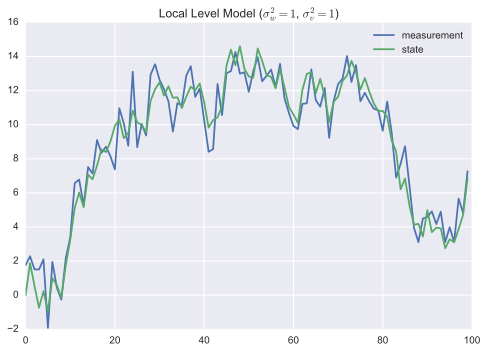

In [4]:
plt.plot(y1, label="measurement")
plt.plot(x1, label="state")
plt.legend()
plt.title("Local Level Model ($\sigma_w^2 = 1$, $\sigma_v^2 = 1$)")
plt.show()

이 모형은 이노베이션 과정의 공분산 $\sigma_w^2$와 관측 잡음의 공분산 $\sigma_v^2$가 각각 $\sigma_w^2 = 1$, $\sigma_v^2 = 1$ 인 경우이다. 이 값이 달라지면 어떻게 되는지 살펴보자.

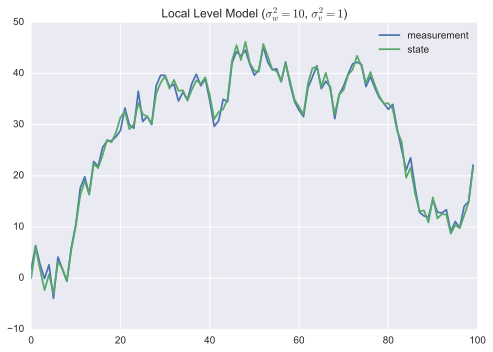

In [5]:
mod2 = KalmanFilter(k_states=1, k_endog=1, 
                    transition=[[1]], selection=[[1]], state_cov=[[10]], 
                    design=[[1]], obs_cov=[[1]])
np.random.seed(0)
y2, x2 = mod2.simulate(100)
plt.plot(y2, label="measurement")
plt.plot(x2, label="state")
plt.legend()
plt.title("Local Level Model ($\sigma_w^2 = 10$, $\sigma_v^2 = 1$)")
plt.show()

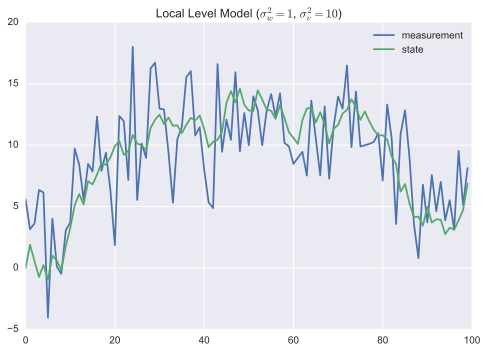

In [6]:
mod3 = KalmanFilter(k_states=1, k_endog=1, 
                    transition=[[1]], selection=[[1]], state_cov=[[1]], 
                    design=[[1]], obs_cov=[[10]])
np.random.seed(0)
y3, x3 = mod3.simulate(100)
plt.plot(y3, label="measurement")
plt.plot(x3, label="state")
plt.legend()
plt.title("Local Level Model ($\sigma_w^2 = 1$, $\sigma_v^2 = 10$)")
plt.show()

이제 칼만 필터링을 사용하여 상태변수를 추정하여 보자. `UnobservedComponents` 클래스를 사용하여 모형 추정까지 한 번에 수행할 수 있다.

In [7]:
mod3f = sm.tsa.UnobservedComponents(y3, 'local level')
res3f = mod3f.fit()
print(res3f.summary())

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  100
Model:                    local level   Log Likelihood                -265.887
Date:                Fri, 20 May 2016   AIC                            535.773
Time:                        01:01:05   BIC                            540.984
Sample:                             0   HQIC                           537.882
                                - 100                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     9.3929      1.565      6.001      0.000       6.325      12.461
sigma2.level         0.7692      0.436      1.763      0.078      -0.086       1.624
Ljung-Box (Q):              

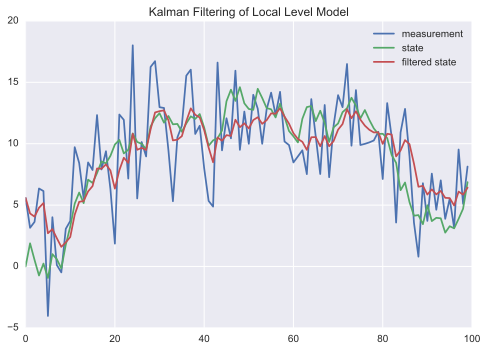

In [8]:
plt.plot(y3, label="measurement")
plt.plot(x3, label="state")
plt.plot(res3f.filtered_state[0], label="filtered state")
plt.legend()
plt.title("Kalman Filtering of Local Level Model")
plt.show()

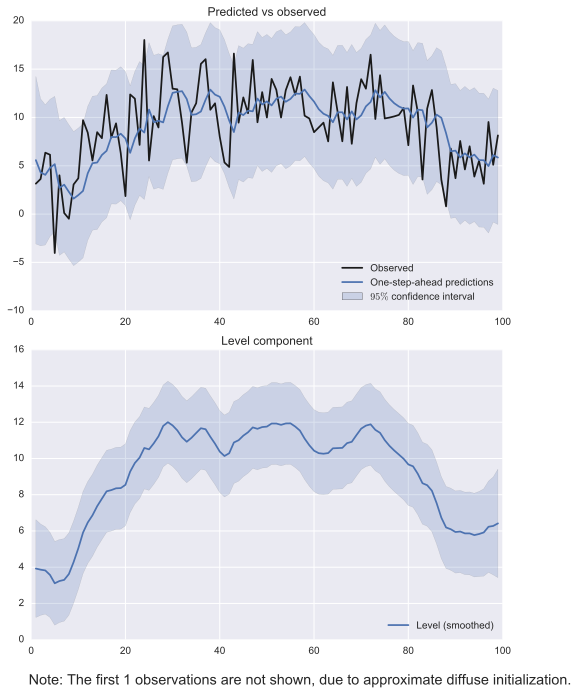

In [11]:
res3f.plot_components(legend_loc="lower right", figsize=(8,10))
plt.tight_layout(pad=3, h_pad=0.8)
plt.show()

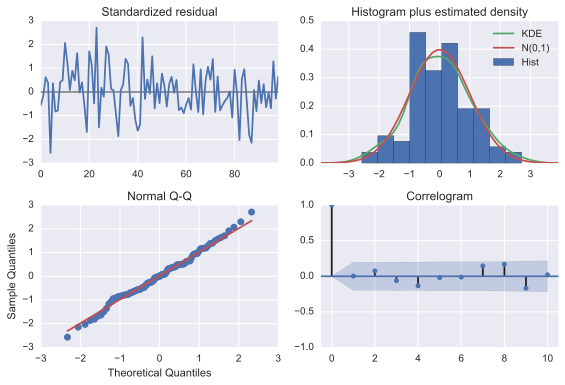

In [12]:
res3f.plot_diagnostics()
plt.tight_layout()
plt.show()

In [13]:
forecast = res3f.get_forecast(50)

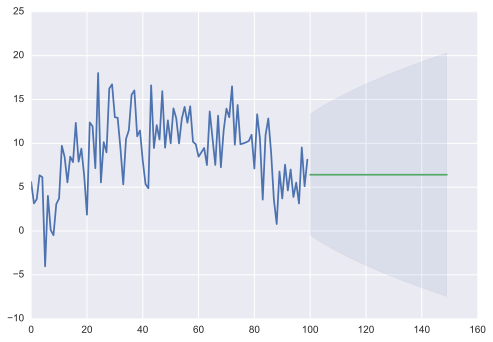

In [14]:
plt.plot(y3, label="measurement")
forecast_ci = forecast.conf_int()
forecast_index = np.arange(len(y1), len(y1) + len(forecast_ci))
plt.plot(forecast_index, forecast.predicted_mean, label="measurement")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.1)
plt.show()